Error Visualization
========

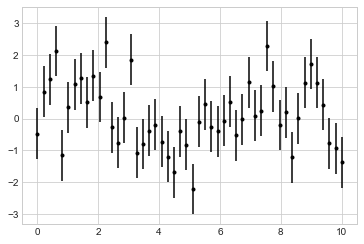

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr = dy, fmt = '.k');

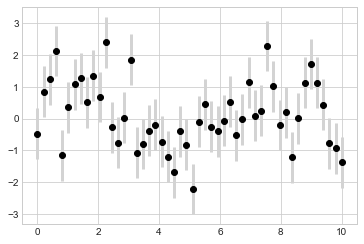

In [2]:
plt.errorbar(x, y, yerr = dy, fmt = 'o', color = 'black',
            ecolor = 'lightgray', elinewidth = 3, capsize = 0);

Sequential Errors
------

In [4]:
from sklearn.gaussian_process import GaussianProcess

model = lambda x:x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

gp = GaussianProcess(corr = 'cubic', theta0 = 1e-2, thetaL = 1e-4, thetaU = 1E-1,
                    random_start = 100)
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE = True)
dyfit = 2 * np.sqrt(MSE)

In [ ]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color = 'gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                color = 'gray', alpha = 0.2)
plt.xlim(0, 1)